# Module 11 – Decision Trees: Hands-on Notebook

This notebook covers everything you need to know about Decision Trees:
- **11.3 – Building a simple decision tree with synthetic data**
- **11.4 – Overfitting and pruning**
- **11.5 – Evaluating a decision tree (accuracy, precision, recall, F1, confusion matrix)**
- **11.6 – ROC curve and AUC**

Each section includes:
- Simple explanations for beginners
- Step-by-step code with comments
- Visual examples
- Real-world analogies to help understanding

## Common Imports

### What are these libraries?
- **numpy**: Python's library for numerical operations (think of it as a powerful calculator for arrays)
- **pandas**: For data manipulation and analysis (think Excel for Python)
- **matplotlib**: For creating visualizations and plots
- **sklearn**: Scikit-learn - Python's machine learning library with ready-to-use algorithms

In [2]:
# Import all the libraries we'll need
import numpy as np                  # For numerical operations
import pandas as pd                 # For data manipulation
import matplotlib.pyplot as plt     # For plotting

# Decision Tree related imports
from sklearn.tree import DecisionTreeClassifier, plot_tree

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For evaluating our model's performance
from sklearn.metrics import (
    confusion_matrix,               # To see what we got right/wrong
    accuracy_score,                 # Overall correctness
    precision_score,                # Of all positive predictions, how many were correct
    recall_score,                   # Of all actual positives, how many did we catch
    f1_score,                       # Balance between precision and recall
    roc_curve,                      # For ROC analysis
    auc,                            # Area under the ROC curve
)

# Make plots a bit larger by default for better visibility
plt.rcParams['figure.figsize'] = (7, 5)

print("All libraries imported successfully!")

All libraries imported successfully!


---
# Module 11.3 – Building a Simple Decision Tree (Synthetic Data)

## What is a Decision Tree?

A Decision Tree is like a flowchart that helps make decisions. Here's a simple analogy:

Imagine you're deciding whether to play outside:
1. First, check: Is it sunny? 
   - If YES: Check if it's windy
     - If NO WIND: PLAY! ✅
     - If WINDY: Still PLAY (but maybe not as fun) ✅
   - If NO (rainy): 
     - Check if it's windy
     - If WINDY: DON'T PLAY ❌
     - If NO WIND: DON'T PLAY ❌

This flowchart is exactly what a Decision Tree learns from data!

### How do Decision Trees work?
1. Start at the root (top of the tree)
2. Ask a question about a feature
3. Based on the answer, go to left or right branch
4. Continue until reaching a leaf (final decision)

### Key Terms:
- **Root Node**: The starting question
- **Internal Node**: A question in the middle of the tree
- **Leaf Node**: A final answer/prediction
- **Depth**: How many questions you ask before getting an answer

### 11.3.1 Create a small synthetic dataset

Let's create a simple dataset about playing outside based on weather conditions. This will help us understand how a decision tree makes decisions.

In [4]:
# Create a dataset about playing outside based on weather
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],  # 0=No, 1=Yes
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]   # 1=Play, 0=Don't Play
}

# Convert to a pandas DataFrame (like a spreadsheet in Python)
df_synthetic = pd.DataFrame(data)

# Display the dataset
print("Our Dataset:")
print(df_synthetic)
print("\nDataset Info:")
print(f"- Total records: {len(df_synthetic)}")
print(f"- Features: Weather, Windy")
print(f"- Target: Play (1=Yes, 0=No)")

Our Dataset:
  Weather  Windy  Play
0   Sunny      0     1
1   Rainy      1     0
2   Sunny      0     1
3   Sunny      1     1
4   Rainy      0     0
5   Rainy      1     0
6   Sunny      0     1
7   Rainy      1     0

Dataset Info:
- Total records: 8
- Features: Weather, Windy
- Target: Play (1=Yes, 0=No)


### Understanding the Dataset

Looking at our data, we can see some patterns:
- When it's Sunny and not windy → Play (1)
- When it's Rainy and windy → Don't Play (0)
- When it's Sunny but windy → Play (1)
- When it's Rainy and not windy → Don't Play (0)

A decision tree will learn these patterns automatically!

### 11.3.2 Encode categorical feature and prepare X, y

### Why do we need to encode?
Machine learning models only understand numbers, not text. So we need to convert:
- 'Sunny' → 1
- 'Rainy' → 0

### What are X and y?
- **X**: Features (inputs) - the questions we ask
- **y**: Target (output) - the answer we want to predict

In [5]:
# Convert categorical text to numbers
# map() applies a function to each element
df_synthetic['Weather_num'] = df_synthetic['Weather'].map({'Sunny': 1, 'Rainy': 0})

print("Dataset with Numerical Weather:")
print(df_synthetic)
# X contains the features (inputs) - what we use to make decisions
# y contains the target (output) - what we want to predict
X_syn = df_synthetic[['Weather_num', 'Windy']]      # Features: Weather (as number) and Windy
y_syn = df_synthetic['Play']                        # Target: Should we play?

print("\nPrepared Features and Target:")
print("Features (X):")
print(X_syn)
print("\nTarget (y):")
print(y_syn)

Dataset with Numerical Weather:
  Weather  Windy  Play  Weather_num
0   Sunny      0     1            1
1   Rainy      1     0            0
2   Sunny      0     1            1
3   Sunny      1     1            1
4   Rainy      0     0            0
5   Rainy      1     0            0
6   Sunny      0     1            1
7   Rainy      1     0            0

Prepared Features and Target:
Features (X):
   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1

Target (y):
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


### 11.3.3 Train a simple decision tree

### What does 'training' mean?
Training is when the machine learns patterns from our data. It's like studying for an exam:
- The model looks at all examples
- It finds the best questions to ask
- It builds a flowchart (decision tree) that gives correct answers

### What is max_depth?
max_depth limits how many questions the tree can ask. Small depth = simpler tree, less chance of overthinking!

In [6]:
# Create a Decision Tree Classifier
# - max_depth=3: Can ask up to 3 questions before making a decision
# - random_state=42: Makes the randomness predictable (same results every time)
tree_syn = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the tree on our data
# This is where the tree learns the patterns from our examples
tree_syn.fit(X_syn, y_syn)

print("Decision Tree trained successfully!")
print(f"Tree depth: {tree_syn.get_depth()}")
print(f"Number of leaves: {tree_syn.get_n_leaves()}")

Decision Tree trained successfully!
Tree depth: 1
Number of leaves: 2


### 11.3.4 Visualize the tree

### How to read the tree visualization:
1. **Top box (root)**: First question the tree asks
2. **Left branch**: When condition is True/Yes
3. **Right branch**: When condition is False/No
4. **Each box shows**:
   - The condition (e.g., Weather_num <= 0.5)
   - gini: How mixed the samples are (0 = pure, 0.5 = 50/50 mix)
   - samples: How many examples reached this node
   - value: How many are in each class [No, Yes]
   - class: The majority class prediction

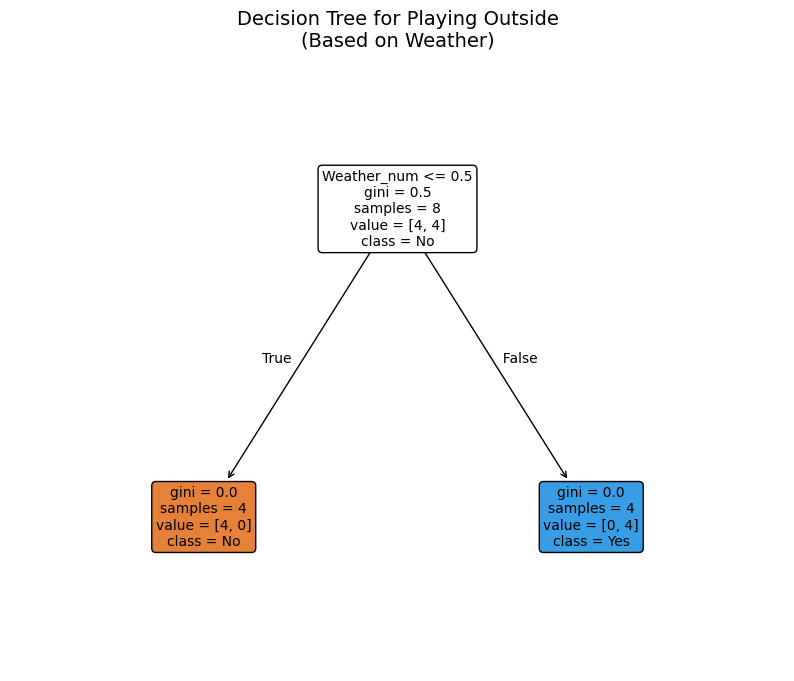


How to read this tree:
1. Start at the top (root node)
2. If condition is True, go left; if False, go right
3. Colors: Orange = 'No' (Don't play), Green = 'Yes' (Play)
4. The darker the color, the more confident the prediction


In [7]:
# Create a visualization of our decision tree
plt.figure(figsize=(10, 8))                     # Make the plot bigger
plot_tree(
    tree_syn,
    feature_names=['Weather_num', 'Windy'],     # Name our features
    class_names=['No', 'Yes'],                  # Name our classes
    filled=True,                                # Color the nodes
    rounded=True,                               # Use rounded corners
    fontsize=10                                 # Make text readable
)
plt.title("Decision Tree for Playing Outside\n(Based on Weather)", fontsize=14)
plt.show()

print("\nHow to read this tree:")
print("1. Start at the top (root node)")
print("2. If condition is True, go left; if False, go right")
print("3. Colors: Orange = 'No' (Don't play), Green = 'Yes' (Play)")
print("4. The darker the color, the more confident the prediction")

### 11.3.5 Quick prediction examples

Now let's use our trained tree to make predictions on new situations!

In [8]:
# Example 1: Sunny and not windy
print("" + "="*50)
print("EXAMPLE 1: Sunny, Not Windy")
print("="*50)
example_1 = pd.DataFrame([[1, 0]], columns=['Weather_num', 'Windy'])
pred_1 = tree_syn.predict(example_1)[0]
prob_1 = tree_syn.predict_proba(example_1)[0]

print(f"Weather: Sunny (1), Windy: No (0)")
print(f"Prediction: {'Play' if pred_1 == 1 else 'Don\'t Play'}")
print(f"Confidence: {prob_1[1]:.1%} for Play, {prob_1[0]:.1%} for Don't Play")

# Example 2: Rainy and windy
print("\n" + "="*50)
print("EXAMPLE 2: Rainy, Windy")
print("="*50)
example_2 = pd.DataFrame([[0, 1]], columns=['Weather_num', 'Windy'])
pred_2 = tree_syn.predict(example_2)[0]
prob_2 = tree_syn.predict_proba(example_2)[0]

print(f"Weather: Rainy (0), Windy: Yes (1)")
print(f"Prediction: {'Play' if pred_2 == 1 else 'Don\'t Play'}")
print(f"Confidence: {prob_2[1]:.1%} for Play, {prob_2[0]:.1%} for Don't Play")

# Try a few more examples
print("\n" + "="*50)
print("EXAMPLE 3: Sunny, Windy")
print("="*50)
example_3 = pd.DataFrame([[1, 1]], columns=['Weather_num', 'Windy'])
pred_3 = tree_syn.predict(example_3)[0]
print(f"Weather: Sunny (1), Windy: Yes (1) → {'Play' if pred_3 == 1 else 'Don\'t Play'}")

print("\n" + "="*50)
print("EXAMPLE 4: Rainy, Not Windy")
print("="*50)
example_4 = pd.DataFrame([[0, 0]], columns=['Weather_num', 'Windy'])
pred_4 = tree_syn.predict(example_4)[0]
print(f"Weather: Rainy (0), Windy: No (0) → {'Play' if pred_4 == 1 else 'Don\'t Play'}")

EXAMPLE 1: Sunny, Not Windy
Weather: Sunny (1), Windy: No (0)
Prediction: Play
Confidence: 100.0% for Play, 0.0% for Don't Play

EXAMPLE 2: Rainy, Windy
Weather: Rainy (0), Windy: Yes (1)
Prediction: Don't Play
Confidence: 0.0% for Play, 100.0% for Don't Play

EXAMPLE 3: Sunny, Windy
Weather: Sunny (1), Windy: Yes (1) → Play

EXAMPLE 4: Rainy, Not Windy
Weather: Rainy (0), Windy: No (0) → Don't Play


---
# Module 11.4 – Overfitting and Pruning

## What is Overfitting?

### Analogy: Studying for a Test
**Good Student (No Overfitting):**
- Understands the concepts
- Can solve new problems
- Gets good grades on exams

**Overfitting Student:**
- Memorizes exact examples from practice tests
- Perfect on practice questions
- Fails when questions are slightly different

### In Decision Trees:
- **Overfitting**: Tree becomes too complex, memorizes training data
- **Symptom**: Perfect on training data, poor on new data
- **Solution**: Pruning (trimming the tree)

### 11.4.1 Create a slightly larger synthetic dataset

To see overfitting, we need more data. Let's create a synthetic medical dataset.

In [9]:
# Create a synthetic medical dataset for demonstration
from sklearn.datasets import make_classification

# Generate synthetic data
X_big, y_big = make_classification(
    n_samples=400,      # Total patients
    n_features=5,       # 5 medical measurements
    n_informative=3,    # Only 3 are actually useful
    n_redundant=0,      # No correlated features
    n_classes=2,        # 2 outcomes: healthy or sick
    random_state=42,    # For reproducible results
)

# Split into training and testing sets
# Training: Data to learn from (like practice problems)
# Testing: New data to evaluate (like the actual exam)
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(
    X_big, y_big, test_size=0.3, random_state=42
)

print(f"Dataset created:")
print(f"- Total samples: {len(X_big)}")
print(f"- Training samples: {len(X_train_big)} (70%)")
print(f"- Testing samples: {len(X_test_big)} (30%)")
print(f"- Features: {X_big.shape[1]} medical measurements")
print(f"\nThis is like having {len(X_train_big)} patients to learn from")
print(f"and testing on {len(X_test_big)} new patients!")

Dataset created:
- Total samples: 400
- Training samples: 280 (70%)
- Testing samples: 120 (30%)
- Features: 5 medical measurements

This is like having 280 patients to learn from
and testing on 120 new patients!


### 11.4.2 Train a deep tree vs a pruned tree

Let's see the difference between:
1. **Deep Tree**: No limits (can grow very complex)
2. **Pruned Tree**: Limited depth (simpler, more general)

In [10]:
# Train two different trees

# Deep Tree - No depth limit (can overfit)
print("Training DEEP Tree (no limits)...")
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big, y_train_big)

# Pruned Tree - Limited depth (less likely to overfit)
print("Training PRUNED Tree (max_depth=3)...")
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train_big, y_train_big)

# Make predictions on training and test data
y_train_pred_deep = deep_tree.predict(X_train_big)
y_test_pred_deep = deep_tree.predict(X_test_big)

y_train_pred_pruned = pruned_tree.predict(X_train_big)
y_test_pred_pruned = pruned_tree.predict(X_test_big)

# Calculate accuracies
deep_train_acc = accuracy_score(y_train_big, y_train_pred_deep)
deep_test_acc = accuracy_score(y_test_big, y_test_pred_deep)

pruned_train_acc = accuracy_score(y_train_big, y_train_pred_pruned)
pruned_test_acc = accuracy_score(y_test_big, y_test_pred_pruned)

print("\n" + "="*60)
print("RESULTS COMPARISON")
print("="*60)
print(f"\nDEEP TREE (no limits):")
print(f"  Training Accuracy: {deep_train_acc:.1%} (perfect! memorized everything)")
print(f"  Test Accuracy: {deep_test_acc:.1%} (lower on new data - overfitting!)")
print(f"  Tree depth: {deep_tree.get_depth()}")

print(f"\nPRUNED TREE (max_depth=3):")
print(f"  Training Accuracy: {pruned_train_acc:.1%} (good but not perfect)")
print(f"  Test Accuracy: {pruned_test_acc:.1%} (similar to training - good generalization!)")
print(f"  Tree depth: {pruned_tree.get_depth()}")

print("\n" + "="*60)
print("KEY INSIGHT:")
print("- Deep tree: Perfect on training, worse on test = OVERFITTING")
print("- Pruned tree: Similar performance on both = GOOD GENERALIZATION")
print("="*60)

Training DEEP Tree (no limits)...
Training PRUNED Tree (max_depth=3)...

RESULTS COMPARISON

DEEP TREE (no limits):
  Training Accuracy: 100.0% (perfect! memorized everything)
  Test Accuracy: 88.3% (lower on new data - overfitting!)
  Tree depth: 10

PRUNED TREE (max_depth=3):
  Training Accuracy: 90.4% (good but not perfect)
  Test Accuracy: 89.2% (similar to training - good generalization!)
  Tree depth: 3

KEY INSIGHT:
- Deep tree: Perfect on training, worse on test = OVERFITTING
- Pruned tree: Similar performance on both = GOOD GENERALIZATION


### 11.4.3 Visual comparison of deep vs pruned trees

Deep Tree Visualization:
(This tree has grown very complex to perfectly fit training data)


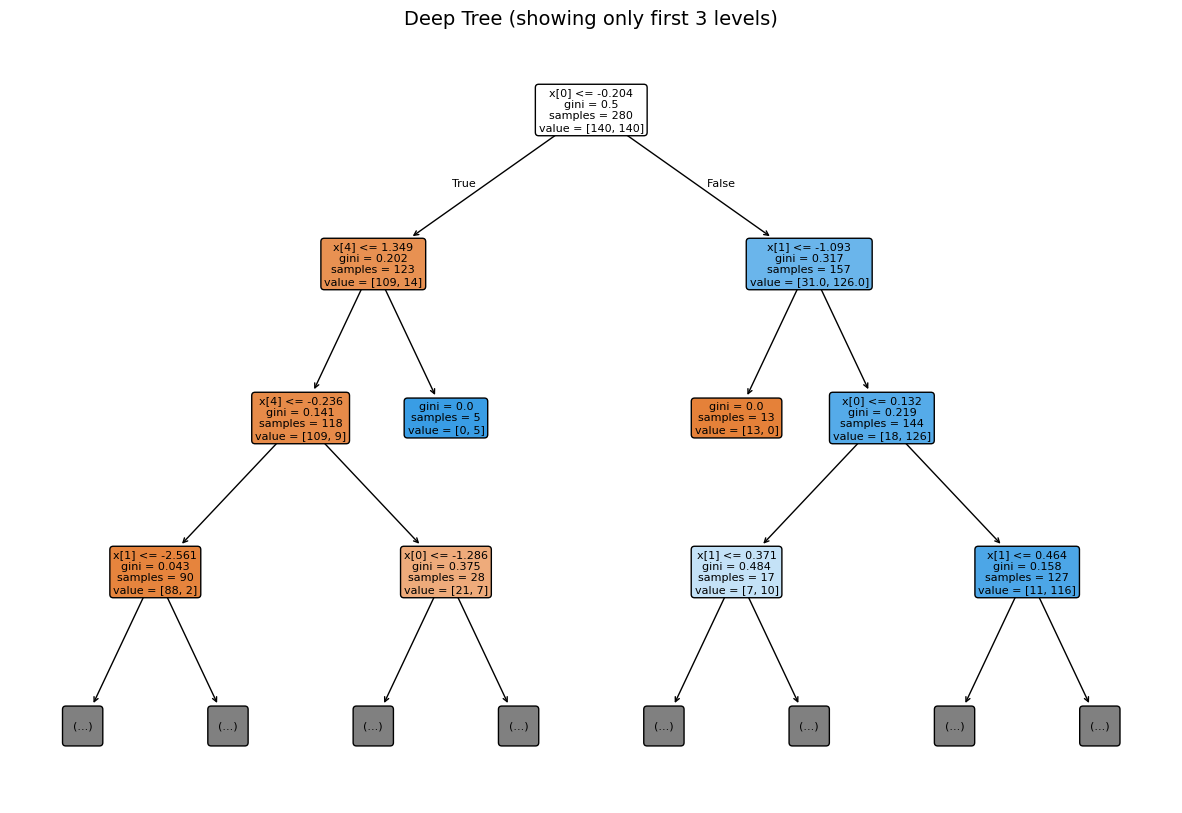


Pruned Tree Visualization:
(This tree is simpler and more interpretable)


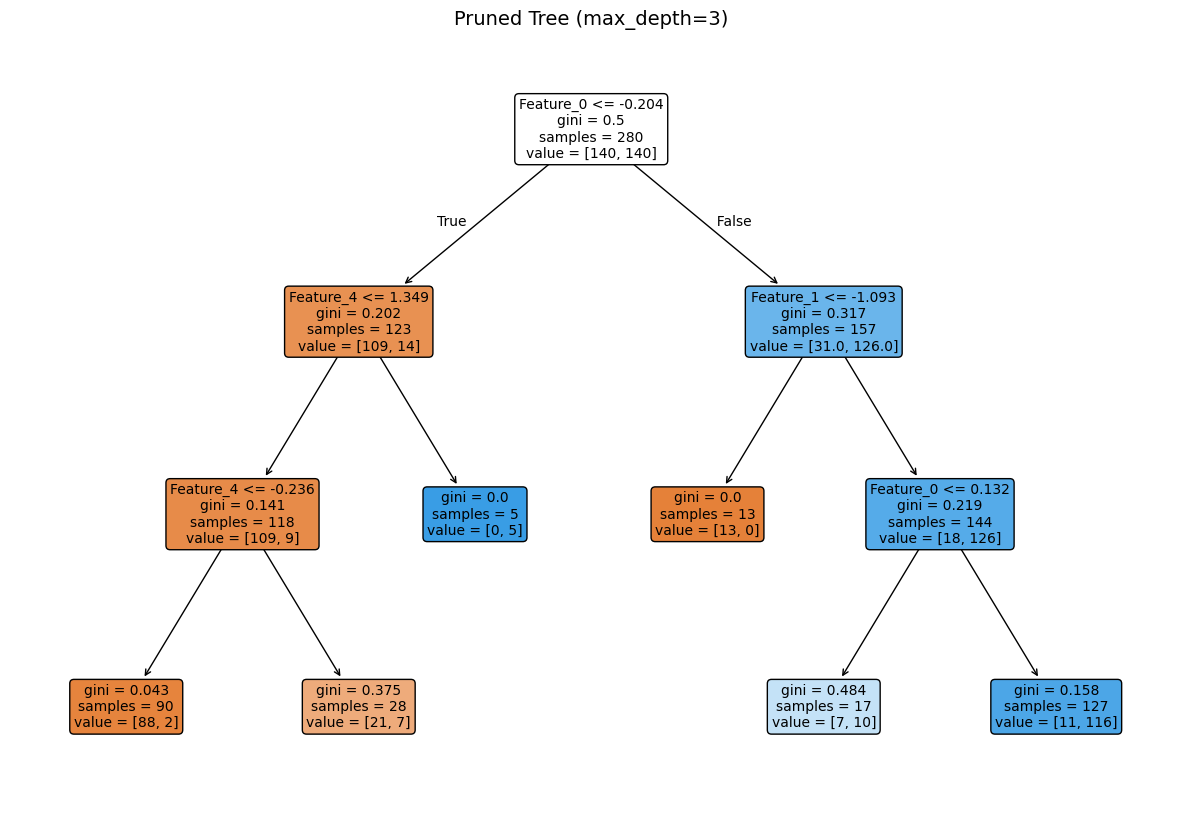

OBSERVATIONS:
1. Deep tree creates many specific rules (overfitting)
2. Pruned tree creates general, simpler rules
3. In practice, simpler trees often work better on new data!


In [11]:
# Visualize the deep tree (might be complex!)
print("Deep Tree Visualization:")
print("(This tree has grown very complex to perfectly fit training data)")
plt.figure(figsize=(15, 10))
plot_tree(
    deep_tree,
    filled=True,
    rounded=True,
    max_depth=3,  # Only show top 3 levels for readability
    fontsize=8
)
plt.title("Deep Tree (showing only first 3 levels)", fontsize=14)
plt.show()

# Visualize the pruned tree
print("\nPruned Tree Visualization:")
print("(This tree is simpler and more interpretable)")
plt.figure(figsize=(15, 10))
plot_tree(
    pruned_tree,
    filled=True,
    rounded=True,
    fontsize=10,
    feature_names=[f'Feature_{i}' for i in range(5)]  # Generic feature names
)
plt.title("Pruned Tree (max_depth=3)", fontsize=14)
plt.show()

print("" + "="*60)
print("OBSERVATIONS:")
print("1. Deep tree creates many specific rules (overfitting)")
print("2. Pruned tree creates general, simpler rules")
print("3. In practice, simpler trees often work better on new data!")
print("="*60)

---
# Module 11.5 – Evaluating a Decision Tree

## Why do we need evaluation metrics?

### Example: Medical Diagnosis
Imagine a model that predicts if a patient has a disease:

**Accuracy alone can be misleading!**
- If only 1% of patients have the disease
- A model that always says "No Disease" has 99% accuracy
- But it never catches actual diseases! Useless!

### Key Metrics:

1. **Confusion Matrix**: Shows exactly what the model got right/wrong
   - True Positives (TP): Correctly predicted positive
   - True Negatives (TN): Correctly predicted negative
   - False Positives (FP): Wrongly predicted positive (Type I error)
   - False Negatives (FN): Wrongly predicted negative (Type II error)

2. **Accuracy**: Overall correctness
   - Formula: (TP + TN) / (TP + TN + FP + FN)

3. **Precision**: Of all positive predictions, how many were correct?
   - Formula: TP / (TP + FP)
   - Use when: False positives are costly (spam detection)

4. **Recall (Sensitivity)**: Of all actual positives, how many did we catch?
   - Formula: TP / (TP + FN)
   - Use when: False negatives are costly (medical diagnosis)

5. **F1 Score**: Balance between precision and recall
   - Formula: 2 × (Precision × Recall) / (Precision + Recall)
   - Use when: You need a single metric for imbalanced classes

### 11.5.1 Create a toy heart-disease-like dataset

In [ ]:
# Create a synthetic heart disease dataset
np.random.seed(42)                                      # For reproducible results
n_samples = 300

# Generate patient data
age = np.random.randint(30, 80, size=n_samples)         # Patient age
chol = np.random.randint(150, 300, size=n_samples)      # Cholesterol level
thalach = np.random.randint(90, 200, size=n_samples)    # Max heart rate achieved

# Create a realistic risk score (higher = more likely to have disease)
# Age and cholesterol increase risk, high heart rate decreases risk
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))             # Convert to probability using sigmoid

# Create binary target: 1 = disease, 0 = no disease
target = (prob > np.median(prob)).astype(int)

# Create DataFrame
df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

print("Heart Disease Dataset:")
print(df_heart.head(10))
print(f"\nDataset Summary:")
print(f"- Total patients: {len(df_heart)}")
print(f"- Patients with disease: {df_heart['target'].sum()} ({df_heart['target'].mean():.1%})")
print(f"- Patients without disease: {len(df_heart) - df_heart['target'].sum()} ({(1-df_heart['target'].mean()):.1%})")

Heart Disease Dataset:
   age  chol  thalach  target
0   68   253      128       1
1   58   233       90       1
2   44   261       92       1
3   72   248      166       1
4   37   242      181       0
5   50   295      151       1
6   68   277      152       1
7   48   259      114       1
8   52   231      145       0
9   40   203      122       0

Dataset Summary:
- Total patients: 300
- Patients with disease: 150 (50.0%)
- Patients without disease: 150 (50.0%)


### 11.5.2 Train-test split and model training

In [13]:
# Prepare features and target
X_heart = df_heart[['age', 'chol', 'thalach']]      # Features
y_heart = df_heart['target']                        # Target

# Split into training (80%) and testing (20%) sets
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42
)

# Train a decision tree
tree_heart = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_heart.fit(X_train_h, y_train_h)

print("Model trained on heart disease data!")
print(f"Training set: {len(X_train_h)} patients")
print(f"Test set: {len(X_test_h)} patients")
print(f"\nTree will make decisions based on:")
print(f"1. Age (30-80 years)")
print(f"2. Cholesterol (150-300 mg/dL)")
print(f"3. Max Heart Rate (90-200 bpm)")

Model trained on heart disease data!
Training set: 240 patients
Test set: 60 patients

Tree will make decisions based on:
1. Age (30-80 years)
2. Cholesterol (150-300 mg/dL)
3. Max Heart Rate (90-200 bpm)


### 11.5.3 Confusion Matrix

The confusion matrix helps us see exactly what our model got right and wrong.

For medical diagnosis:
- **True Negative (TN)**: Correctly identified healthy patients
- **True Positive (TP)**: Correctly identified sick patients
- **False Positive (FP)**: Said sick but actually healthy (false alarm)
- **False Negative (FN)**: Said healthy but actually sick (missed diagnosis - DANGEROUS!)

In [14]:
# Make predictions on test set
y_pred_h = tree_heart.predict(X_test_h)

# Calculate confusion matrix
cm = confusion_matrix(y_test_h, y_pred_h)

print("Confusion Matrix:")
print("                   Predicted")
print("                   No Disease  Disease")
print(f"Actual No Disease    {cm[0,0]:2d}        {cm[0,1]:2d}")
print(f"       Disease       {cm[1,0]:2d}        {cm[1,1]:2d}")

# Calculate and display what each number means
TN, FP, FN, TP = cm.ravel()
print(f"\nBreakdown:")
print(f"- True Negatives (TN): {TN} - Correctly said 'No Disease'")
print(f"- False Positives (FP): {FP} - Wrongly said 'Disease' (False Alarm)")
print(f"- False Negatives (FN): {FN} - Wrongly said 'No Disease' (Missed Case!)")
print(f"- True Positives (TP): {TP} - Correctly said 'Disease'")

print(f"\nTotal test cases: {len(y_test_h)}")

Confusion Matrix:
                   Predicted
                   No Disease  Disease
Actual No Disease    23         3
       Disease        6        28

Breakdown:
- True Negatives (TN): 23 - Correctly said 'No Disease'
- False Positives (FP): 3 - Wrongly said 'Disease' (False Alarm)
- False Negatives (FN): 6 - Wrongly said 'No Disease' (Missed Case!)
- True Positives (TP): 28 - Correctly said 'Disease'

Total test cases: 60


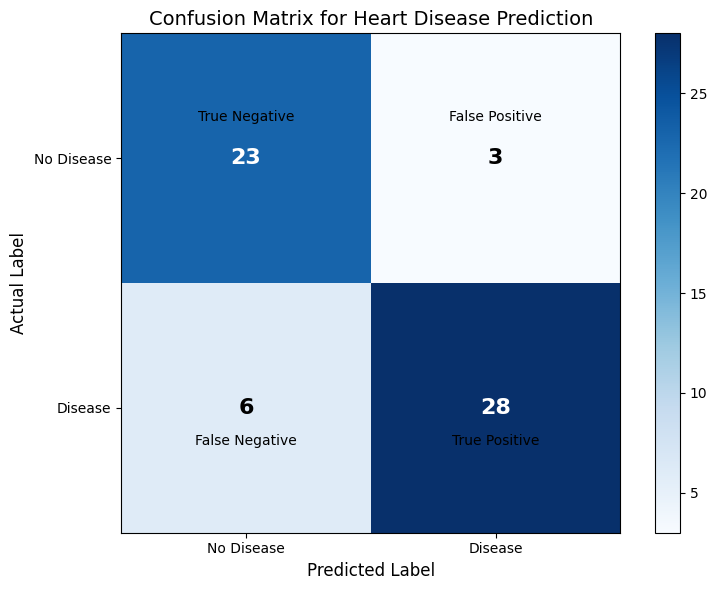


Color Guide:
- Darker blue = More correct predictions (good!)
- Lighter blue = Fewer correct predictions
- Diagonal (top-left to bottom-right) = Correct predictions
- Off-diagonal = Errors (we want these to be small!)


In [22]:
# Visualize the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add title and labels
ax.set_title('Confusion Matrix for Heart Disease Prediction', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('Actual Label', fontsize=12)

# Set ticks and labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No Disease', 'Disease'])
ax.set_yticklabels(['No Disease', 'Disease'])

# Add text annotations in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = 'white' if i == j and cm[i, j] > cm.max() / 2 else 'black'
        ax.text(j, i, str(cm[i, j]), ha='center', va='center',
                color=text_color, fontsize=16, fontweight='bold')

# Add a color bar
plt.colorbar(im, ax=ax)

# Add annotations explaining each quadrant
plt.text(-0.0, -0.15, 'True Negative', fontsize=10, ha='center')
plt.text(1.0, -0.15, 'False Positive', fontsize=10, ha='center')
plt.text(-0.0, 1.15, 'False Negative', fontsize=10, ha='center')
plt.text(1.0, 1.15, 'True Positive', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print("\nColor Guide:")
print("- Darker blue = More correct predictions (good!)")
print("- Lighter blue = Fewer correct predictions")
print("- Diagonal (top-left to bottom-right) = Correct predictions")
print("- Off-diagonal = Errors (we want these to be small!)")

### 11.5.4 Accuracy, Precision, Recall, F1

Now let's calculate all the important metrics to understand our model's performance.

In [43]:
# Calculate all metrics
acc = accuracy_score(y_test_h, y_pred_h)
prec = precision_score(y_test_h, y_pred_h)
rec = recall_score(y_test_h, y_pred_h)
f1 = f1_score(y_test_h, y_pred_h)

# Display results with explanations
print("MODEL PERFORMANCE METRICS:")
print("="*50)

print(f"\n1. ACCURACY: {acc:.1%}")
print(f"   What it means: Overall, the model is correct {acc:.1%} of the time")
print(f"   Formula: (TP + TN) / Total = ({TP} + {TN}) / {len(y_test_h)}")

print(f"\n2. PRECISION: {prec:.1%}")
print(f"   What it means: When the model predicts 'Disease', it's right {prec:.1%} of the time")
print(f"   Formula: TP / (TP + FP) = {TP} / ({TP} + {FP})")
print(f"   Important for: Avoiding false alarms")

print(f"\n3. RECALL (Sensitivity): {rec:.1%}")
print(f"   What it means: The model catches {rec:.1%} of all actual disease cases")
print(f"   Formula: TP / (TP + FN) = {TP} / ({TP} + {FN})")
print(f"   CRITICAL for medical diagnosis - we don't want to miss sick patients!")

print(f"\n4. F1 SCORE: {f1:.1%}")
print(f"   What it means: Balance between precision and recall")
print(f"   Formula: 2 × (Precision × Recall) / (Precision + Recall)")
print(f"   Useful when: You need a single metric for imbalanced classes")

# Trade-off explanation
print("\n" + "="*50)
print("UNDERSTANDING THE TRADE-OFFS:")
print("="*50)
if rec > 0.8:
    print("✓ High recall: Good at catching diseases!")
else:
    print("⚠ Low recall: Missing too many disease cases!")

if prec > 0.8:
    print("✓ High precision: Few false alarms!")
else:
    print("⚠ Low precision: Too many false alarms!")

print(f"\nFor medical diagnosis, RECALL is often most important.")
print(f"It's better to have a false alarm than miss a disease!")

MODEL PERFORMANCE METRICS:

1. ACCURACY: 85.0%
   What it means: Overall, the model is correct 85.0% of the time
   Formula: (TP + TN) / Total = (28 + 23) / 60

2. PRECISION: 90.3%
   What it means: When the model predicts 'Disease', it's right 90.3% of the time
   Formula: TP / (TP + FP) = 28 / (28 + 3)
   Important for: Avoiding false alarms

3. RECALL (Sensitivity): 82.4%
   What it means: The model catches 82.4% of all actual disease cases
   Formula: TP / (TP + FN) = 28 / (28 + 6)
   CRITICAL for medical diagnosis - we don't want to miss sick patients!

4. F1 SCORE: 86.2%
   What it means: Balance between precision and recall
   Formula: 2 × (Precision × Recall) / (Precision + Recall)
   Useful when: You need a single metric for imbalanced classes

UNDERSTANDING THE TRADE-OFFS:
✓ High recall: Good at catching diseases!
✓ High precision: Few false alarms!

For medical diagnosis, RECALL is often most important.
It's better to have a false alarm than miss a disease!


---
# Module 11.6 – ROC Curve and AUC

## What are ROC and AUC?

### ROC (Receiver Operating Characteristic) Curve
Think of a doctor deciding on a disease test threshold:

**Very Strict Threshold** (only flag severe cases):
- Few false positives (high precision)
- But might miss mild cases (low recall)

**Very Lenient Threshold** (flag anything suspicious):
- Catches almost all diseases (high recall)
- But many false alarms (low precision)

The ROC curve shows how the model performs at ALL possible thresholds!

### AUC (Area Under the Curve)
- AUC = 1.0: Perfect model
- AUC = 0.5: No better than random guessing
- AUC < 0.5: Model is worse than random (probably inverted)

### Why use ROC/AUC?
1. **Threshold independent**: Evaluates model regardless of threshold
2. **Good for imbalanced data**: Works even when classes are uneven
3. **Single number**: AUC gives one score to compare models

### 11.6.1 Predicted probabilities

Instead of just predicting 0 or 1, let's see how confident the model is in its predictions.

In [34]:
# Get predicted probabilities (not just 0/1 predictions)
# predict_proba returns [probability of class 0, probability of class 1]
y_proba_h = tree_heart.predict_proba(X_test_h)[:, 1]  # We want probability of class 1 (Disease)

# Show some examples with probabilities
print("MODEL PREDICTIONS WITH CONFIDENCE:")
print("="*50)
print("Patient | Predicted | Confidence | Actual")
print("        | Disease   | (Disease)  | Result")
print("-"*50)

# Show first 10 predictions
for i in range(min(10, len(y_test_h))):
    actual = 'Disease' if y_test_h.iloc[i] == 1 else 'No Disease'
    pred = 'Disease' if y_pred_h[i] == 1 else 'No Disease'
    conf = y_proba_h[i]
    print(f"  {i+1:2d}    | {pred:9s} | {conf:9.1%} | {actual}")

print("\n" + "="*50)
print("UNDERSTANDING PROBABILITIES:")
print("- 0.00: 100% sure it's 'No Disease'")
print("- 0.50: Completely unsure (50/50)")
print("- 1.00: 100% sure it's 'Disease'")
print("- Default threshold is 0.50")
print("="*50)

# Show probability distribution
print(f"\nProbability Statistics:")
print(f"- Mean confidence: {y_proba_h.mean():.1%}")
print(f"- Min confidence: {y_proba_h.min():.1%}")
print(f"- Max confidence: {y_proba_h.max():.1%}")

MODEL PREDICTIONS WITH CONFIDENCE:
Patient | Predicted | Confidence | Actual
        | Disease   | (Disease)  | Result
--------------------------------------------------
   1    | Disease   |     87.5% | Disease
   2    | No Disease |      0.0% | Disease
   3    | No Disease |      4.8% | No Disease
   4    | No Disease |      0.0% | No Disease
   5    | Disease   |     87.5% | Disease
   6    | Disease   |    100.0% | Disease
   7    | Disease   |    100.0% | Disease
   8    | Disease   |    100.0% | Disease
   9    | Disease   |    100.0% | Disease
  10    | No Disease |      0.0% | No Disease

UNDERSTANDING PROBABILITIES:
- 0.00: 100% sure it's 'No Disease'
- 0.50: Completely unsure (50/50)
- 1.00: 100% sure it's 'Disease'
- Default threshold is 0.50

Probability Statistics:
- Mean confidence: 51.2%
- Min confidence: 0.0%
- Max confidence: 100.0%


### 11.6.2 ROC curve and AUC

Now let's create the ROC curve and calculate AUC to evaluate our model's overall performance.

In [35]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_h, y_proba_h)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

print("ROC ANALYSIS:")
print("="*50)
print(f"AUC (Area Under Curve): {roc_auc:.3f}")

print("\nInterpreting AUC:")
if roc_auc > 0.9:
    print("✓ Excellent model! (>0.9)")
elif roc_auc > 0.8:
    print("✓ Good model (0.8-0.9)")
elif roc_auc > 0.7:
    print("⚠ Fair model (0.7-0.8)")
elif roc_auc > 0.5:
    print("⚠ Poor model (0.5-0.7)")
else:
    print("✗ Model worse than random (<0.5)")

print("\nWhat ROC curve shows:")
print(f"- False Positive Rate (FPR): FP / (FP + TN) - False alarms")
print(f"- True Positive Rate (TPR): TP / (TP + FN) - Correctly caught diseases")
print(f"- Perfect model: FPR=0, TPR=1 (top-left corner)")
print(f"- Random model: Follows diagonal line")

# Find optimal threshold (closest to top-left corner)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print(f"(This threshold gives best balance between TPR and FPR)")

ROC ANALYSIS:
AUC (Area Under Curve): 0.925

Interpreting AUC:
✓ Excellent model! (>0.9)

What ROC curve shows:
- False Positive Rate (FPR): FP / (FP + TN) - False alarms
- True Positive Rate (TPR): TP / (TP + FN) - Correctly caught diseases
- Perfect model: FPR=0, TPR=1 (top-left corner)
- Random model: Follows diagonal line

Optimal threshold: 0.083
(This threshold gives best balance between TPR and FPR)


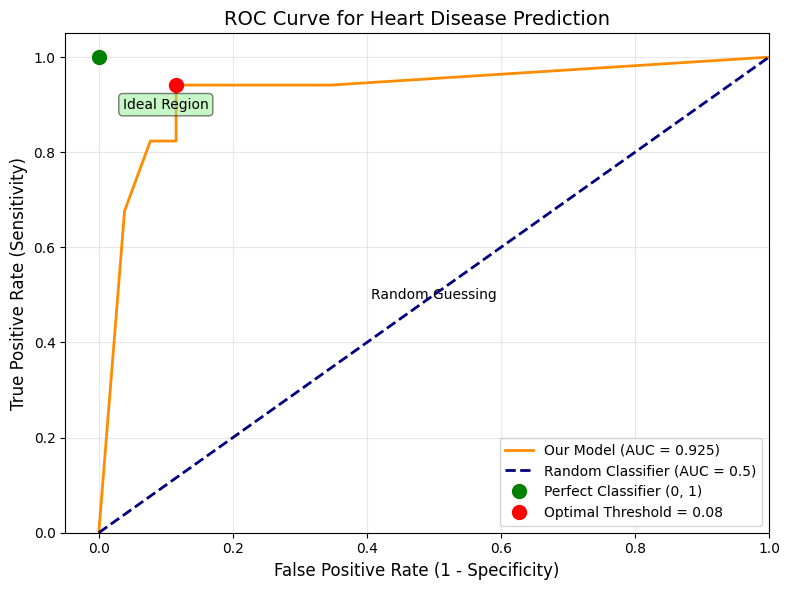

KEY TAKEAWAYS FROM ROC CURVE:
1. The curve shows performance at ALL thresholds
2. Top-left corner = perfect performance
3. Diagonal = random guessing
4. More area under curve = better model
5. Our model's AUC of 0.925 indicates:
   Strong discriminative ability!


In [36]:
# Create the ROC curve plot
plt.figure(figsize=(8, 6))

# Plot our model's ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Our Model (AUC = {roc_auc:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier (AUC = 0.5)')

# Plot perfect classifier point
plt.plot(0, 1, 'go', markersize=10, label='Perfect Classifier (0, 1)')

# Mark the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10,
         label=f'Optimal Threshold = {optimal_threshold:.2f}')

# Formatting
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve for Heart Disease Prediction', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add annotations
plt.text(0.5, 0.5, 'Random Guessing', fontsize=10, ha='center', va='center')
plt.text(0.1, 0.9, 'Ideal Region', fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))

plt.tight_layout()
plt.show()

print("" + "="*60)
print("KEY TAKEAWAYS FROM ROC CURVE:")
print("="*60)
print("1. The curve shows performance at ALL thresholds")
print("2. Top-left corner = perfect performance")
print("3. Diagonal = random guessing")
print("4. More area under curve = better model")
print(f"5. Our model's AUC of {roc_auc:.3f} indicates:")
if roc_auc > 0.8:
    print("   Strong discriminative ability!")
else:
    print("   Could be improved.")
print("="*60)

---
# Complete Summary and Practical Tips

## What We've Learned

### 1. Decision Trees (Module 11.3)
- **How they work**: Like a flowchart of questions
- **Advantages**: Easy to understand and visualize
- **Disadvantages**: Can overfit if too complex

### 2. Overfitting and Pruning (Module 11.4)
- **Overfitting**: Model memorizes training data, fails on new data
- **Solution**: Limit tree depth (pruning)
- **Key insight**: Simpler trees often generalize better

### 3. Model Evaluation (Module 11.5)
- **Confusion Matrix**: Shows what model gets right/wrong
- **Accuracy**: Overall correctness (can be misleading with imbalanced data)
- **Precision**: Of positive predictions, how many are correct
- **Recall**: Of actual positives, how many we caught
- **F1 Score**: Balance between precision and recall

### 4. ROC and AUC (Module 11.6)
- **ROC Curve**: Shows performance at all thresholds
- **AUC**: Single number measuring overall discriminative ability
- **AUC = 1**: Perfect model
- **AUC = 0.5**: No better than random

## Practical Tips for Real Projects

### 1. Before Building a Model
- Understand your problem and data
- Check for missing values and outliers
- Split data into train/test sets

### 2. When Building Decision Trees
- Start with a simple tree (small max_depth)
- Use cross-validation to find optimal parameters
- Consider pruning to prevent overfitting

### 3. Evaluating Your Model
- Don't rely only on accuracy
- Use confusion matrix to understand errors
- Choose metrics based on your problem:
  - Medical diagnosis: Prioritize recall
  - Spam detection: Prioritize precision
  - General: Use F1 or AUC

### 4. Common Pitfalls to Avoid
- Not checking for data leakage
- Using test data for model selection
- Ignoring class imbalance
- Overfitting to training data

## Next Steps
1. Try different tree depths and compare performance
2. Experiment with other algorithms (Random Forest, XGBoost)
3. Apply these concepts to real datasets
4. Learn about feature importance and feature engineering

## Quick Reference Cheat Sheet

### Key Python Functions
```python
# Create and train a decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)
y_proba = tree.predict_proba(X_test)[:, 1]  # Probabilities

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = auc(fpr, tpr)
```

### Interpreting Metrics
- **Accuracy > 90%**: Excellent (but check if classes are balanced)
- **Precision > 80%**: Few false alarms
- **Recall > 80%**: Catches most positive cases
- **F1 > 80%**: Good balance between precision and recall
- **AUC > 0.9**: Excellent model
- **AUC 0.7-0.9**: Good model
- **AUC < 0.7**: Needs improvement

### Remember: No single metric tells the whole story!
Always consider your specific problem requirements.